<h1><center>Titanic Survival prediction using KNN</center></h1>
<p>This notebook uses KNN classification in predicting titanic surviavals. We have already used the same dataset in Random Forest algorithm in which eventhough the accuracy was  igood but it was having a high type 2 error in confusion metrics.</p>
<p>Now let's try KNN classification if that gives us more accuracy with low error.</p>

<b>Import required libraries</b>

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

<b>Read data from the csv file</b>

In [61]:
df = pd.read_csv('titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Transform categorical values

In [62]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [63]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


<b>Split the dataset into features (X) and target variable (Y)</b>

In [64]:
X = df.drop(columns = ['Survived','Name', 'PassengerId', 'Ticket', 'Fare', 'Cabin'], axis=1).values
Y = df['Survived']

<b>Split the data into training and testing sets</b>

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

<b>Create KNN model</b>

In [66]:
knn = KNeighborsClassifier(n_neighbors=1)           

<p>The n_neighbors parameter is set to 1, so that the algorithm will consider only the closest neighbor when making predictions.</p>

<b>Train the model</b>

In [67]:
knn.fit(X_train,Y_train)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Eventhough we transformed the categorical values there are some features with missing values in it. That is the reason of above error so we will use KNNImputer functionality to handle this issue. This functionality is specificaly for KNN for  filling in missing values in a dataset.

In [68]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
X = imputer.fit_transform(X)

<b>Split the data into training and testing sets</b>

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [70]:
knn = KNeighborsClassifier(n_neighbors=1)  

<b>Train the model</b>

In [71]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

<b>Predict with the test data</b>

In [72]:
pred = knn.predict(X_test)

<b>Check the accuracy</b>

In [73]:
knn.score(X_test, Y_test)

0.7238805970149254

<b>Check the confussion matrix</b>

In [74]:
print(confusion_matrix(Y_test,pred))

[[127  41]
 [ 33  67]]


In [75]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       168
           1       0.62      0.67      0.64       100

    accuracy                           0.72       268
   macro avg       0.71      0.71      0.71       268
weighted avg       0.73      0.72      0.73       268



To optimize the error we should find the correct K value so first we will find the relation between K value and error_rate.

In [76]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

<b>Plot the error to K value relation</b>

Text(0, 0.5, 'Error Rate')

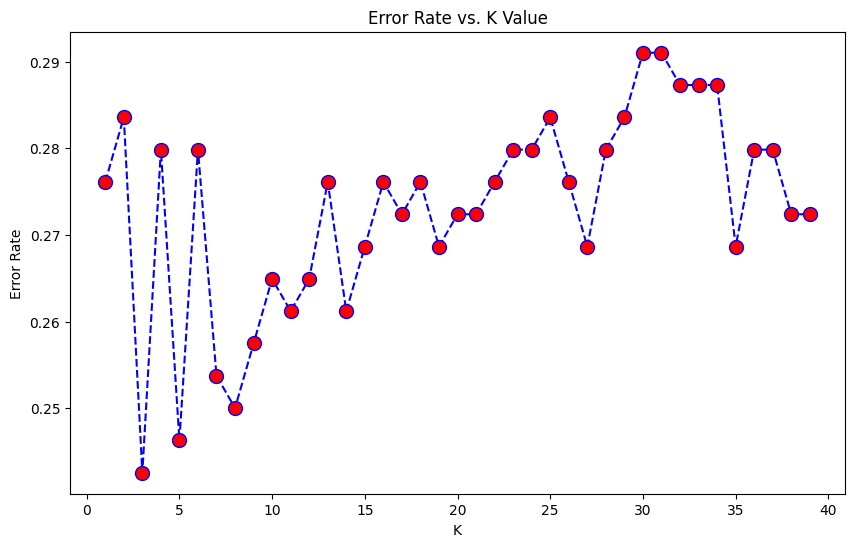

In [77]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')

plt.xlabel('K')

plt.ylabel('Error Rate')

Error seems to be low during the K value between 0 to 5. So let's try with 3 and 5.

In [78]:
knn = KNeighborsClassifier(n_neighbors=3)           
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
knn.score(X_test, Y_test)

0.7574626865671642

In [79]:
print(confusion_matrix(Y_test,pred))

[[143  25]
 [ 40  60]]


In [80]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       168
           1       0.71      0.60      0.65       100

    accuracy                           0.76       268
   macro avg       0.74      0.73      0.73       268
weighted avg       0.75      0.76      0.75       268



In [81]:
knn = KNeighborsClassifier(n_neighbors=5)           
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
knn.score(X_test, Y_test)

0.753731343283582

In [82]:
print(confusion_matrix(Y_test,pred))

[[149  19]
 [ 47  53]]


In [83]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       168
           1       0.74      0.53      0.62       100

    accuracy                           0.75       268
   macro avg       0.75      0.71      0.72       268
weighted avg       0.75      0.75      0.74       268



We can find that as we increase the n_neighbor value the accuracy is increasing and the no of true positives are increasing with lower false negative till the value of n_neighbor is 5. Now let's try it with 6.

In [84]:
knn = KNeighborsClassifier(n_neighbors=6)           
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
knn.score(X_test, Y_test)

0.7201492537313433

In [85]:
confusion_matrix(Y_test,pred)

array([[152,  16],
       [ 59,  41]], dtype=int64)

But when it reached 6 eventhough the confusion matrix is giving more TP and lower FN the accuracy have dropped. So 5 can be assumed as the optimum n_neighbor value for proper prediction.

In [86]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       168
           1       0.72      0.41      0.52       100

    accuracy                           0.72       268
   macro avg       0.72      0.66      0.66       268
weighted avg       0.72      0.72      0.70       268

